In [1]:
library("ggplot2")
library("dplyr")
library("tidyverse")
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Import datasets

In [2]:
name_basics = read.delim("./../dataset/cleaned_filtered_name_basics.tsv",header=TRUE)

In [3]:
title_akas = read.delim("./../dataset/cleaned_filtered_title_akas.tsv",header=TRUE)

In [4]:
title_crew = read.delim("./../dataset/cleaned_filtered_title_crew.tsv",header=TRUE)

In [5]:
title_principals = read.delim("./../dataset/cleaned_filtered_title_principals.tsv",header=TRUE)

In [6]:
title_ratings=read.delim("./../dataset/filtered_title_ratings.tsv",header=TRUE)

In [9]:
title_basics=read.delim("./../dataset/cleaned_filtered_title_basics.tsv",header=TRUE)

## Check out some relationships in the data

### Relationship between averageRating (title.ratings) and runTimeMinutes(title.basics)

In [7]:
nrow(title_ratings)

[1] 423183

In [10]:
nrow(title_basics)

[1] 887805

In [45]:
tbtr = merge(title_basics,title_ratings,by="tconst")

In [48]:
tbtr = tbtr[tbtr$runtimeMinutes!="\\N",]
tbtr = tbtr[tbtr$averageRating!="\\N",]

In [49]:
head(tbtr)

tconst,titleType,isAdult,startYear,runtimeMinutes,genres1,genres2,genres3,averageRating,numVotes
tt0000001,short,0,1894,1,Documentary,Short,0,5.6,1654
tt0000002,short,0,1892,5,Animation,Short,0,6.1,199
tt0000003,short,0,1892,4,Animation,Comedy,Romance,6.5,1366
tt0000004,short,0,1892,12,Animation,Short,0,6.2,121
tt0000005,short,0,1893,1,Comedy,Short,0,6.2,2149
tt0000006,short,0,1894,1,Short,0,0,5.3,115


In [69]:
tbtr$groupMin = as.numeric(cut(tbtr$runtimeMinutes,5))

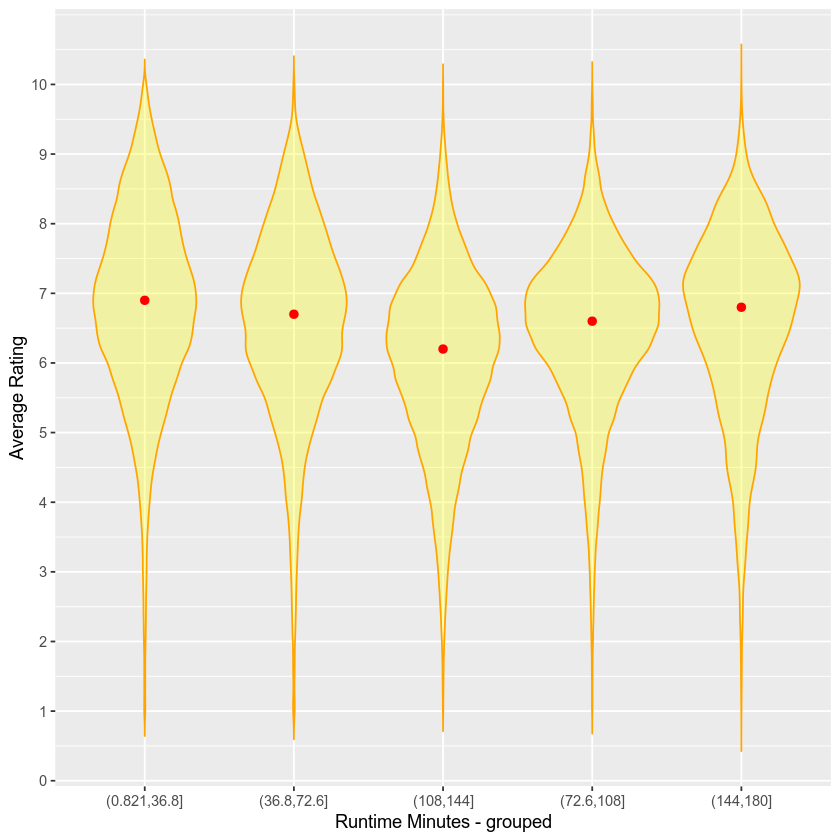

In [100]:
ggplot(tbtr,aes(x=factor(groupMin), y=averageRating)) +geom_violin(trim=FALSE,color="orange",fill="yellow",alpha=0.3)+ stat_summary(fun.y=median, geom="point", size=2, color="red") +scale_x_discrete(name="Runtime Minutes - grouped",breaks=c("1","2","3","4","5"),
        labels=c("(0.821,36.8]","(36.8,72.6]","(108,144]","(72.6,108]","(144,180]")) +scale_y_continuous(name="Average Rating",breaks=c(0:10))

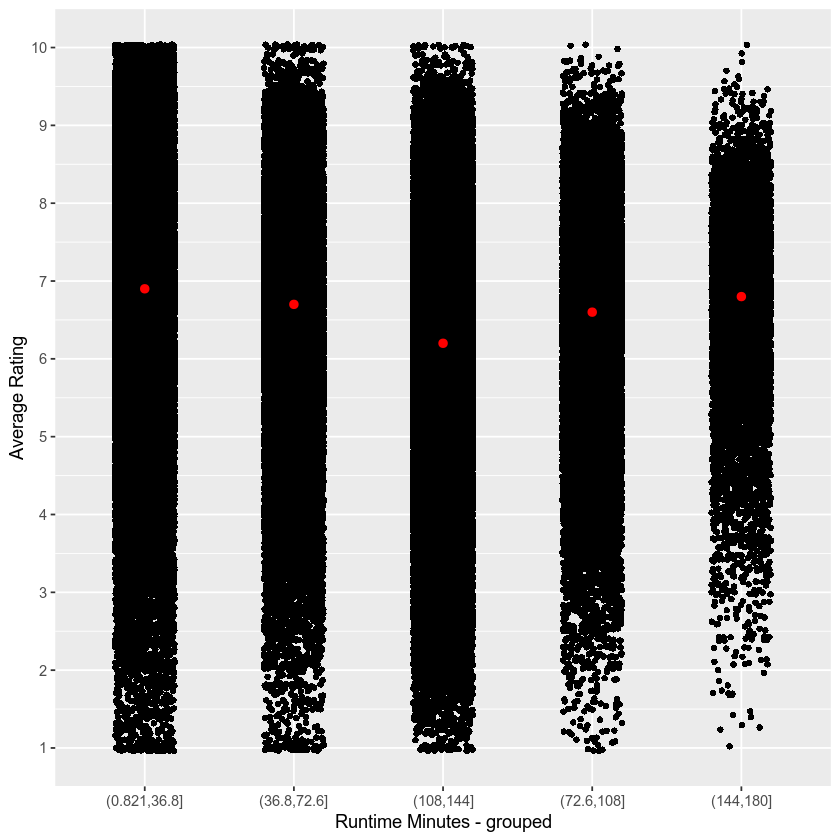

In [101]:
ggplot(tbtr,aes(x=factor(groupMin), y=averageRating))+geom_jitter(shape=16, position=position_jitter(0.2))+ stat_summary(fun.y=median, geom="point", size=2, color="red") +scale_x_discrete(name="Runtime Minutes - grouped",breaks=c("1","2","3","4","5"),
        labels=c("(0.821,36.8]","(36.8,72.6]","(108,144]","(72.6,108]","(144,180]")) +scale_y_continuous(name="Average Rating",breaks=c(0:10)) 

In [78]:
unique(tbtr$groupMin)

[1] 1 2 4 3 5

In [81]:
unique(cut(tbtr$runtimeMinutes,5))

[1] (0.821,36.8] (36.8,72.6]  (108,144]    (72.6,108]   (144,180]   
Levels: (0.821,36.8] (36.8,72.6] (72.6,108] (108,144] (144,180]

- No appearent correlation



### Relationship between the alive participants (name basics) and ratings (title ratings)

In [102]:
trtp = merge(title_principals,title_ratings,by="tconst")

In [103]:
tpnb = merge(title_principals,name_basics,by="nconst")

In [104]:
nrow(trtp)

[1] 1836572

In [105]:
nrow(tpnb)

[1] 4032502

In [106]:
trtpnb = merge(trtp,tpnb,by="tconst")

In [107]:
nrow(trtpnb)

[1] 15182343

In [108]:
head(trtpnb)

tconst,nconst.x,category.x,averageRating,numVotes,nconst.y,category.y,primaryName,primaryProfession1,primaryProfession2,primaryProfession3,knownForTitles1,knownForTitles2,knownForTitles3,knownForTitles4,isDead
tt0000001,nm0005690,director,5.6,1654,nm1588970,self,Carmencita,soundtrack,0,0,tt0000001,tt0057728,0,0,1
tt0000001,nm0005690,director,5.6,1654,nm0374658,cinematographer,William Heise,cinematographer,director,producer,tt0241393,tt0285863,tt0219560,tt0241715,1
tt0000001,nm0005690,director,5.6,1654,nm0005690,director,William K.L. Dickson,cinematographer,director,producer,tt0219560,tt1496763,tt1428455,tt0308254,1
tt0000001,nm1588970,self,5.6,1654,nm1588970,self,Carmencita,soundtrack,0,0,tt0000001,tt0057728,0,0,1
tt0000001,nm1588970,self,5.6,1654,nm0374658,cinematographer,William Heise,cinematographer,director,producer,tt0241393,tt0285863,tt0219560,tt0241715,1
tt0000001,nm1588970,self,5.6,1654,nm0005690,director,William K.L. Dickson,cinematographer,director,producer,tt0219560,tt1496763,tt1428455,tt0308254,1


In [110]:
trtpnb$groupRat = as.numeric(cut(trtpnb$averageRating,10))

In [112]:
trtpnb = trtpnb[trtpnb$averageRating!="\\N",]
trtpnb = trtpnb[trtpnb$isDead!="\\N",]

ERROR while rich displaying an object: Error in UseMethod("group_vars"): no applicable method for 'group_vars' applied to an object of class "c('double', 'numeric')"

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_han

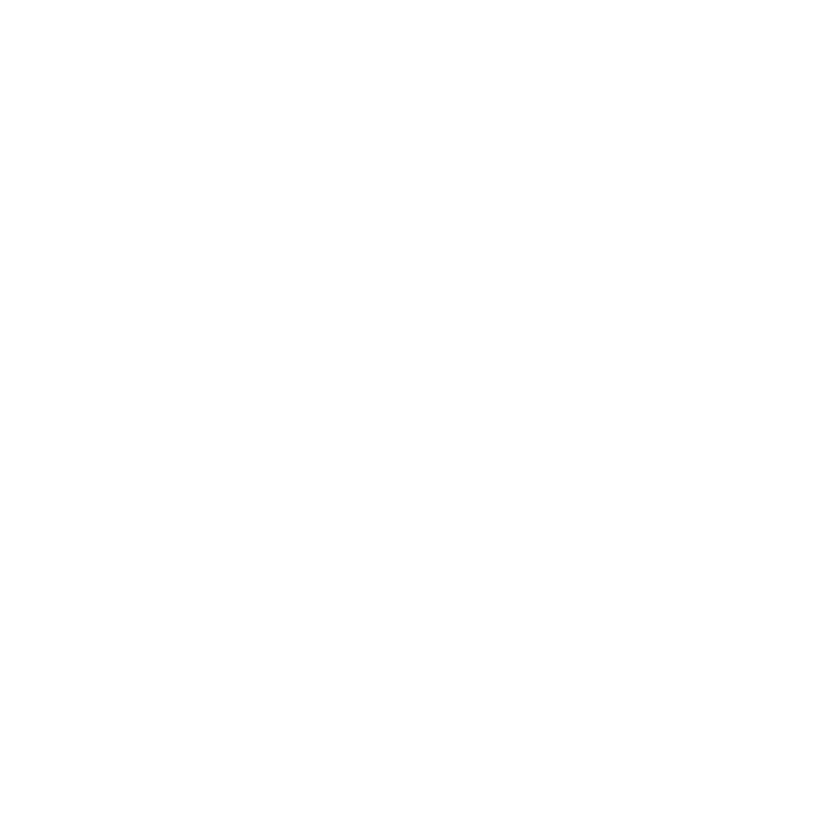

In [114]:
ggplot(trtpnb,aes(x=factor(groupRat),y=count(groupRat),fill=factor(isDead)))+geom_bar(stat="identity")